# Intro to Plotting

### Sneak peak:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
beer = pd.read_csv('../data/random/beer_subset.csv.gz', parse_dates=['time'], compression='gzip')
review_cols = [c for c in beer.columns if c[0:6] == 'review']
beer.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


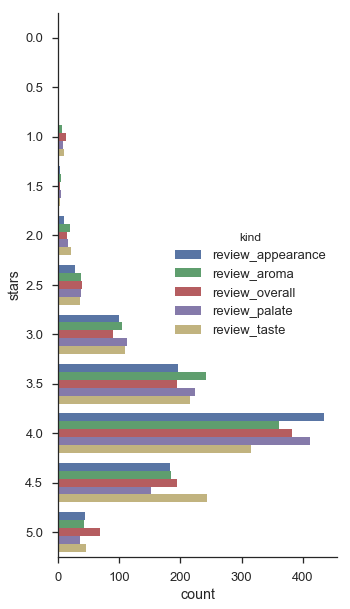

In [3]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.countplot(hue='kind', y='stars', data=(beer[review_cols]
                                           .stack()
                                           .rename_axis(['record', 'kind'])
                                           .rename('stars')
                                           .reset_index()),
              ax=ax, order=np.arange(0, 5.5, .5))
sns.despine()

## Matplotlib

- Tons of features
- "Low-level" library

Check out [the tutorials](http://matplotlib.org/users/beginner.html)

In [4]:
from IPython import display
display.HTML('<iframe src="http://matplotlib.org/users/beginner.html" height=500 width=1024>')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

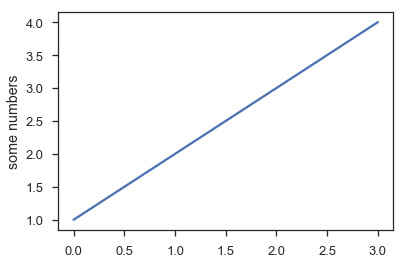

In [6]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

A single series is interpreted as y values, so x is just the index...

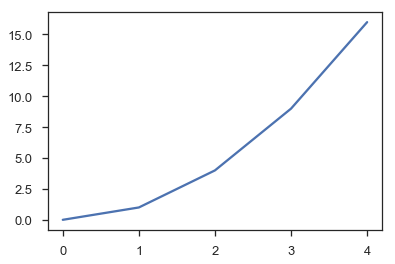

In [7]:
x = np.arange(5)
y = x**2
plt.plot(x, y)

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. 

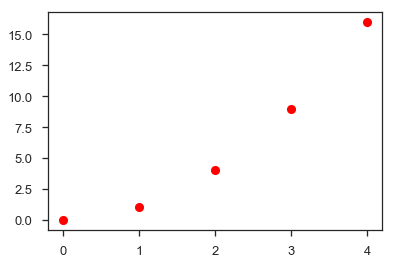

In [8]:
plt.plot(x, y, 'ro')

To work on plots in more detail, it's useful to store the "axis" object

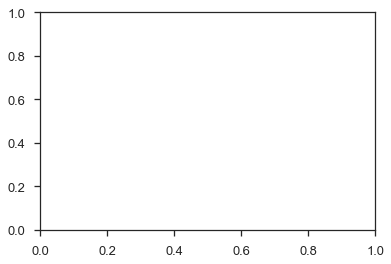

In [9]:
fig, ax = plt.subplots()

In [10]:
ax.

SyntaxError: invalid syntax (<ipython-input-10-8245e8db10a3>, line 1)

In [11]:
ax.plot(x, y, 'ro')

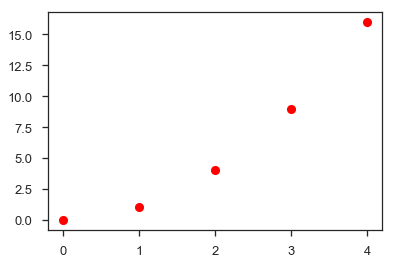

In [12]:
fig

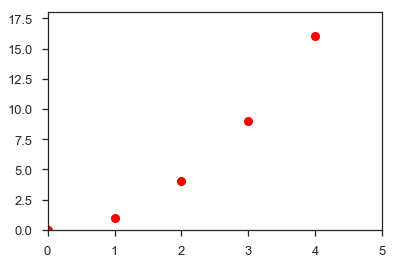

In [13]:
ax.set_xlim([0,5])
ax.set_ylim([0,18])
fig

Lots of `keyword` properties...

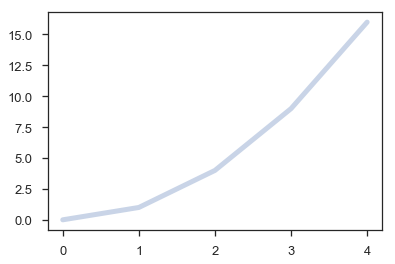

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=5, alpha=.3)

#### Overlaying plots

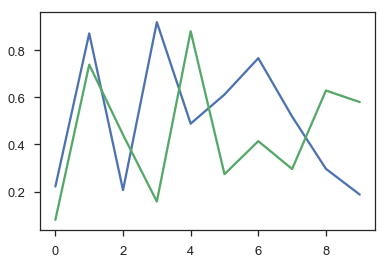

In [15]:
np.random.seed(5)
fig, ax = plt.subplots()
ax.plot(np.arange(10), np.random.rand(10))
ax.plot(np.arange(10), np.random.rand(10))

#### Multiple plots

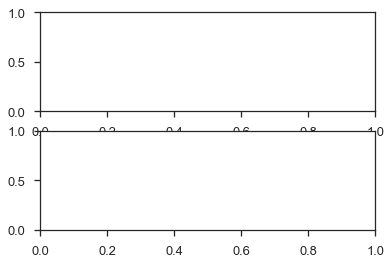

In [16]:
fig, ax = plt.subplots(nrows=2)

In [17]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c9f4dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cb695d0>], dtype=object)

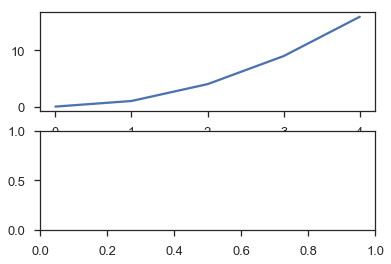

In [18]:
ax[0].plot(x, y)
fig

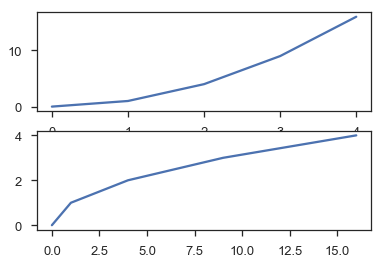

In [19]:
ax[1].plot(y, x)
fig

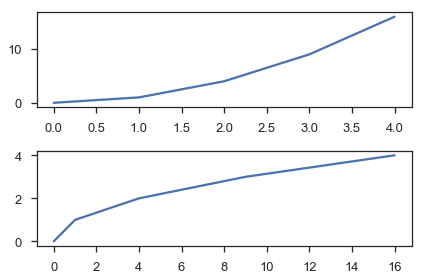

In [20]:
fig.tight_layout()
fig

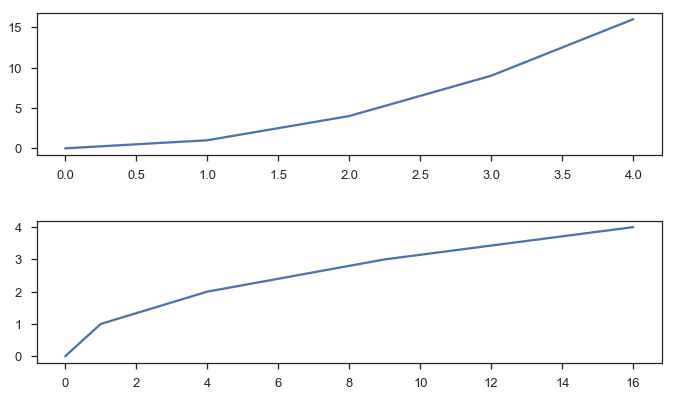

In [21]:
fig.set_size_inches(10,6)
fig

#### Types of axes

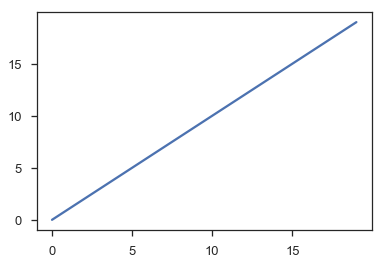

In [22]:
fig, ax = plt.subplots()
ax.plot(np.arange(20))

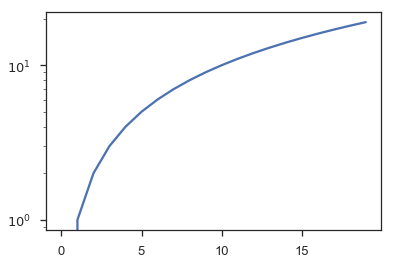

In [23]:
ax.set_yscale('log')
fig

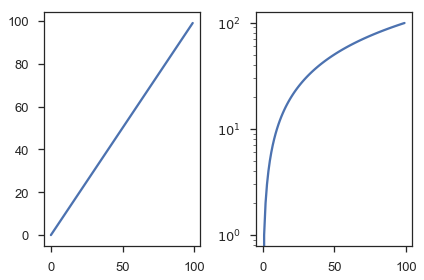

In [24]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.arange(100))
ax[1].plot(np.arange(100))
ax[1].set_yscale('log')
fig.tight_layout()

The best way to learn is [the gallery](http://matplotlib.org/gallery.html)

In [25]:
display.HTML('<iframe src="http://matplotlib.org/gallery.html" height=500 width=1024>')

### A handful of examples

Scatter plots and "bubble charts"

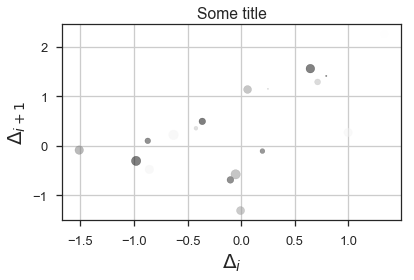

In [26]:
fig, ax = plt.subplots()

n = 20
x = np.random.normal(size=n)
y = np.random.normal(size=n)
c = np.random.uniform(size=n)
s = np.random.randint(100, size=n)
ax.scatter(x, y, c=c, s=s, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Some title')

ax.grid(True)
fig.tight_layout()

#### Bar charts

In [27]:
people = ['Annie', 'Brian', 'Chelsea', 'Derek', 'Elise']
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

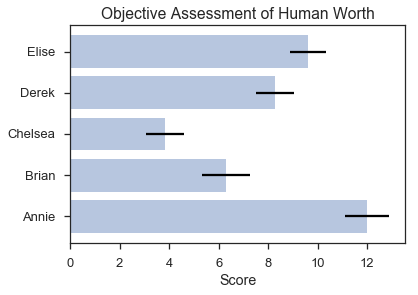

In [28]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(people)), performance, xerr=error, align='center', alpha=0.4)
ax.set_yticks(np.arange(len(people)))
ax.set_yticklabels(people)
ax.set_xlabel('Score')
ax.set_title('Objective Assessment of Human Worth')

# Exercise 1
Using the data we prepared earlier (`data/processed/age_adjusted.hdf`) try to recreate this plot:

![Exercise 1](../img/exercise-1.png)


_Note_: East Asia is location_id 5

__Bonus__: Add uncertainty intervals (_Hint_: look up `plt.fill_between?`)

In [29]:
df = pd.read_hdf('../data/processed/age_adjusted.hdf')
df.head()

mean_rate  lower_rate  upper_rate
location_id year_id                                   
5           1990      0.012118    0.011902    0.012326
            1995      0.011451    0.011263    0.011634
            2000      0.010545    0.010379    0.010698
            2005      0.009297    0.009164    0.009424
            2010      0.008091    0.007969    0.008219

In [30]:
east_asia = df.query('location_id == 5').reset_index()
east_asia

,location_id,year_id,mean_rate,lower_rate,upper_rate
0,5,1990,0.012118,0.011902,0.012326
1,5,1995,0.011451,0.011263,0.011634
2,5,2000,0.010545,0.010379,0.010698
3,5,2005,0.009297,0.009164,0.009424
4,5,2010,0.008091,0.007969,0.008219
5,5,2016,0.007039,0.006906,0.007171


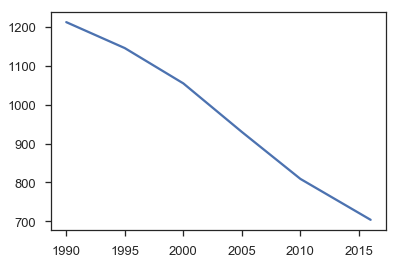

In [31]:
fig, ax = plt.subplots()
ax.plot(east_asia['year_id'], east_asia['mean_rate'] * 1e5)

In [32]:
ax.set_ylabel('Age-adjusted Death Rate (per 100k)')
ax.set_xlabel('Year')
ax.set_title('All-cause Mortality in East Asia')
ax.set_ylim(bottom=0)

(0, 1237.234914085119)

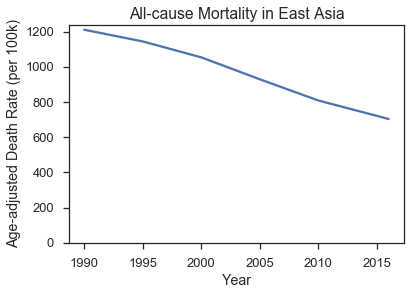

In [33]:
fig

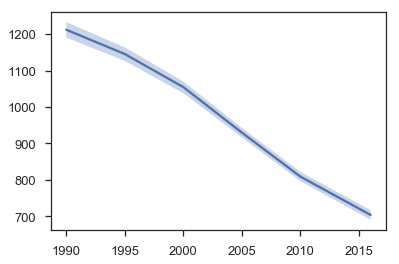

In [34]:
fig, ax = plt.subplots()
ax.fill_between(east_asia['year_id'], east_asia['lower_rate'] * 1e5, east_asia['upper_rate'] * 1e5, alpha=0.3)
ax.plot(east_asia['year_id'], east_asia['mean_rate'] * 1e5)

# Plotting with Pandas

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

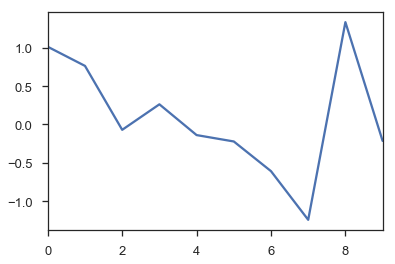

In [35]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

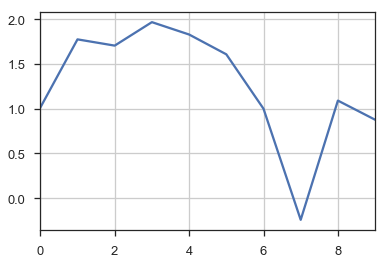

In [36]:
normals.cumsum().plot(grid=True)

Similarly, for a DataFrame:

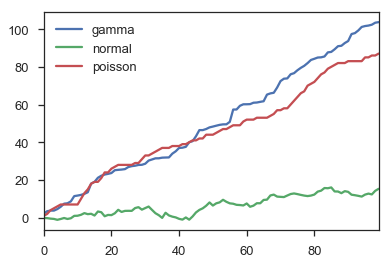

In [37]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                          'gamma': np.random.gamma(1, size=100), 
                          'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

All Pandas plotting commands return `matplotlib` `axis` objects:

matplotlib.axes._subplots.AxesSubplot

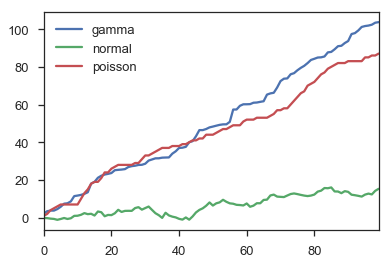

In [38]:
ax = variables.cumsum(0).plot()
type(ax)

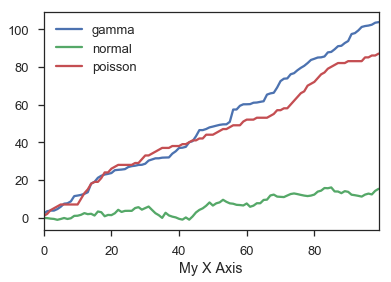

In [39]:
ax.set_xlabel('My X Axis')
ax.figure

In [40]:
ax.vlines?

In [41]:
ax.get_ylim()

(-6.3662766697489257, 108.92728161261648)

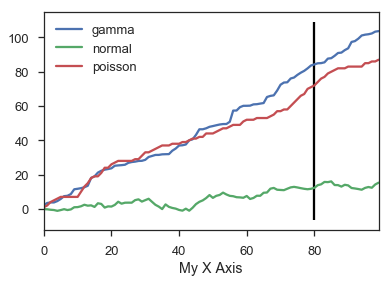

In [42]:
ax.vlines(80, *ax.get_ylim())
ax.figure

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a1fb110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a457310>], dtype=object)

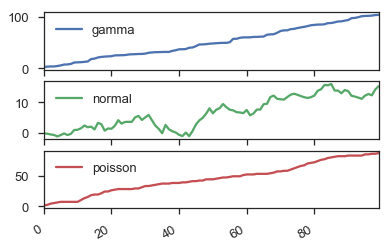

In [43]:
variables.cumsum(0).plot(subplots=True)

Or, we could use a secondary y-axis:

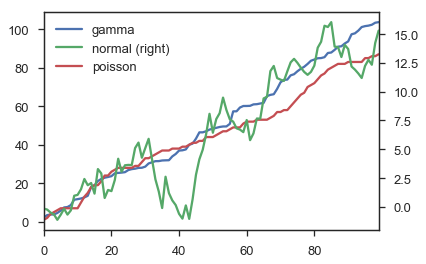

In [44]:
variables.cumsum(0).plot(secondary_y='normal', grid=False)

(Note that ["friends don't let friends use two y-axes"](https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/), but we're just showing some examples here...)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

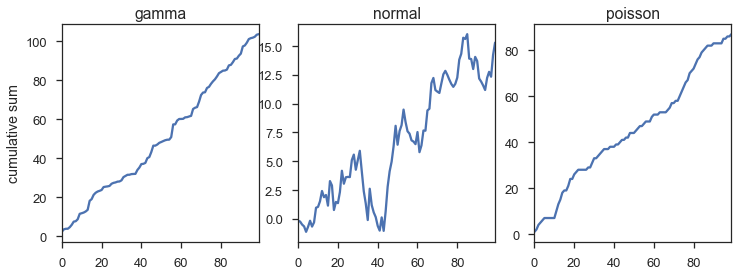

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(variables.columns):
    variables[var].cumsum(0).plot(ax=ax[i], title=var)
ax[0].set_ylabel('cumulative sum')

### Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [46]:
titanic = pd.read_excel("../data/random/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


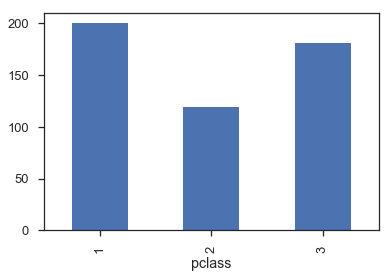

In [47]:
titanic.groupby('pclass')['survived'].sum().plot(kind='bar')

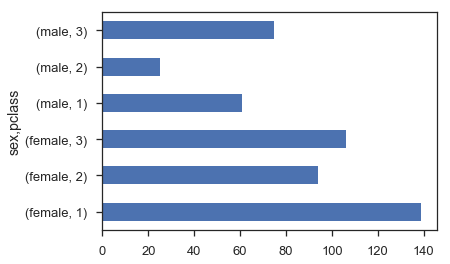

In [48]:
titanic.groupby(['sex','pclass'])['survived'].sum().plot(kind='barh')

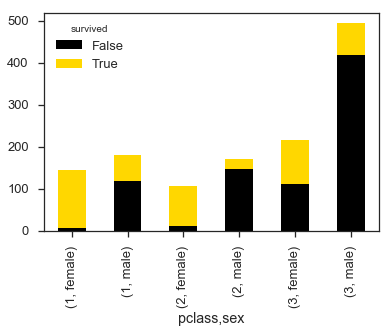

In [49]:
death_counts = pd.crosstab([titanic['pclass'], titanic['sex']], titanic['survived'].astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Or if we wanted to see survival _rate_ instead:

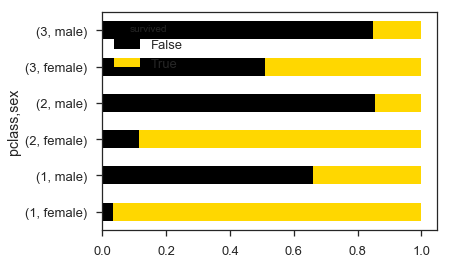

In [50]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequently it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For instance, fare distributions aboard the titanic:

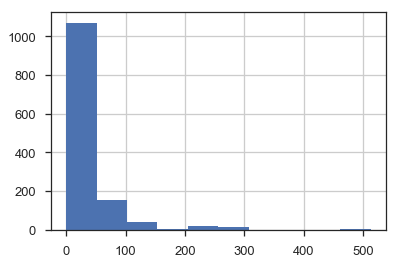

In [51]:
titanic['fare'].hist()

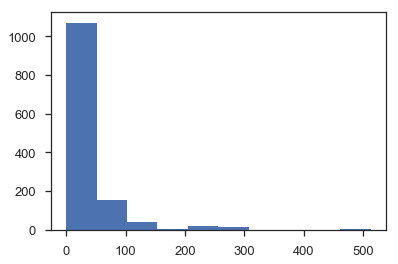

In [52]:
titanic['fare'].hist(grid=False)

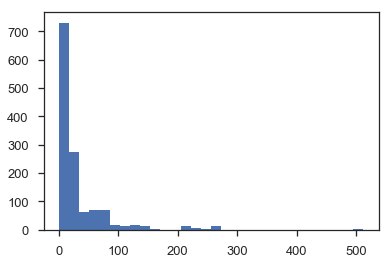

In [53]:
titanic['fare'].hist(grid=False, bins=30)

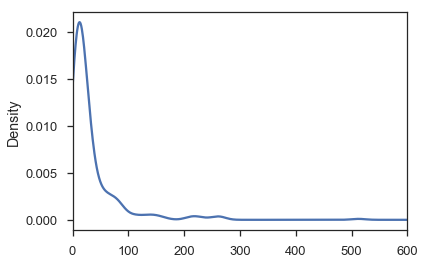

In [54]:
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600))

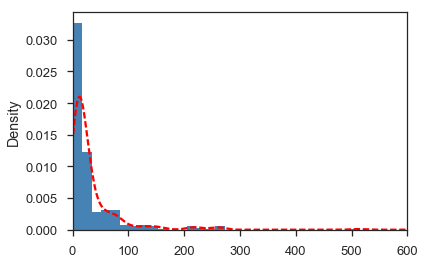

In [55]:
titanic['fare'].hist(bins=30, normed=True, color='steelblue')
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600), style='r--')

### Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

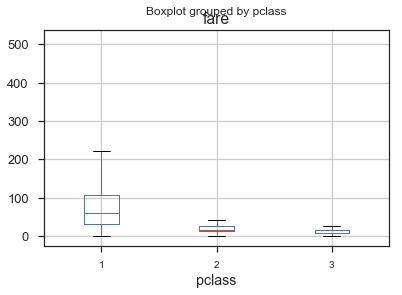

In [56]:
titanic.boxplot(column='fare', by='pclass')

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

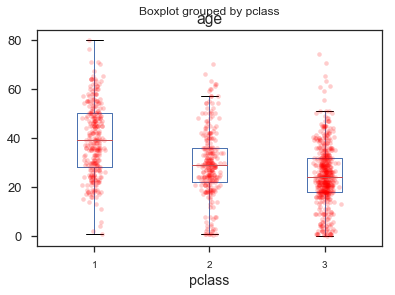

In [57]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

### Scatter plots

In [58]:
beer.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


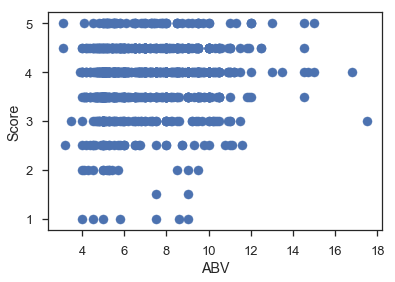

In [59]:
plt.scatter(beer['abv'], beer['review_overall'])
plt.xlabel('ABV')
plt.ylabel('Score')

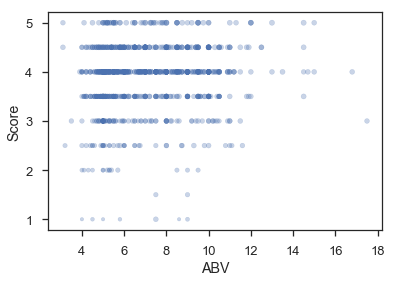

In [60]:
plt.scatter(beer['abv'], beer['review_overall'], s=np.sqrt(beer['review_palate']*150), alpha=0.3)
plt.xlabel('ABV')
plt.ylabel('Score')

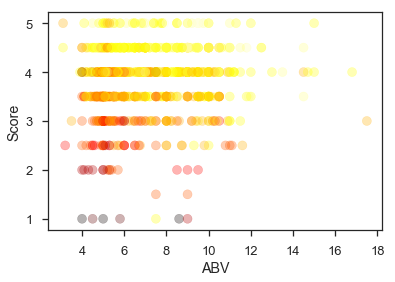

In [61]:
plt.scatter(beer['abv'], beer['review_overall'], alpha=0.3, c=beer.review_palate, cmap='hot')
plt.xlabel('ABV')
plt.ylabel('Score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f8a8090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12059c390>]], dtype=object)

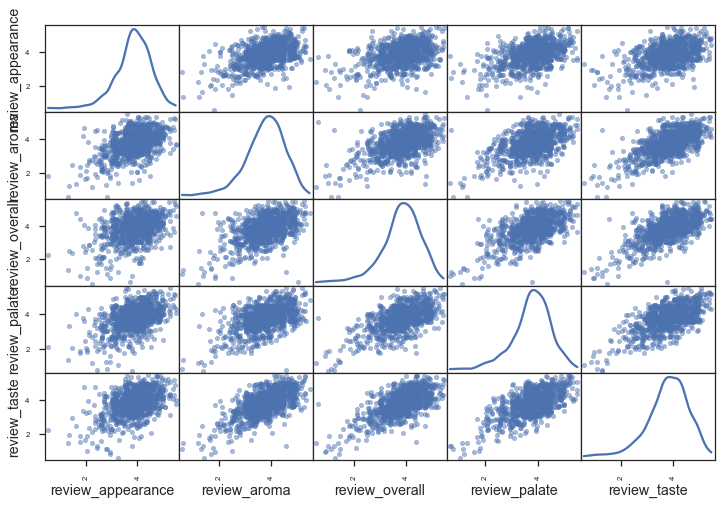

In [62]:
jittered_df = beer[review_cols] + (np.random.rand(*beer[review_cols].shape) - 0.5)
pd.scatter_matrix(jittered_df, figsize=(12,8), diagonal='kde', )

# Exercise 2
Recreate this figure using `pandas.DataFrame.plot`:
![Exercise 2](../img/exercise-2.png)

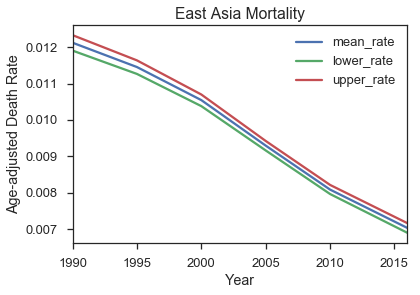

In [63]:
ax = df.query('location_id == 5').reset_index('location_id', drop=True).plot()
ax.set_ylabel('Age-adjusted Death Rate')
ax.set_title('East Asia Mortality')
ax.set_xlabel('Year')

### Lots more info on Pandas plotting in [the docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## [Seaborn](http://seaborn.pydata.org/)

High-level interface for `matplotlib`

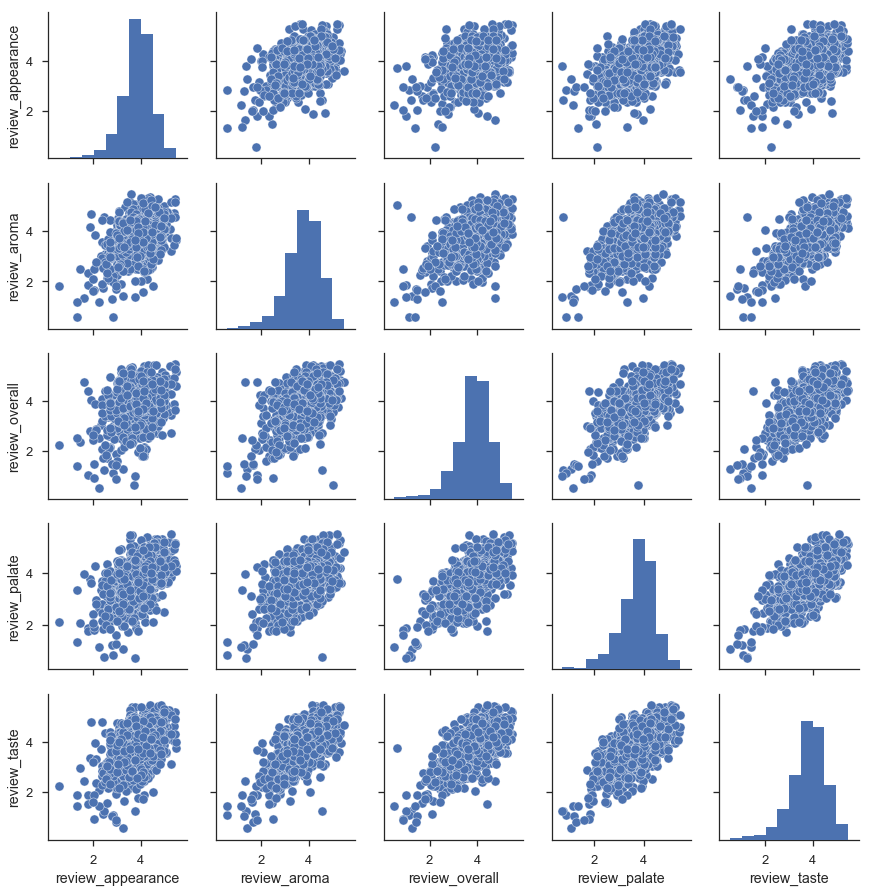

In [64]:
sns.pairplot(jittered_df[review_cols])

In [65]:
sns.pairplot?

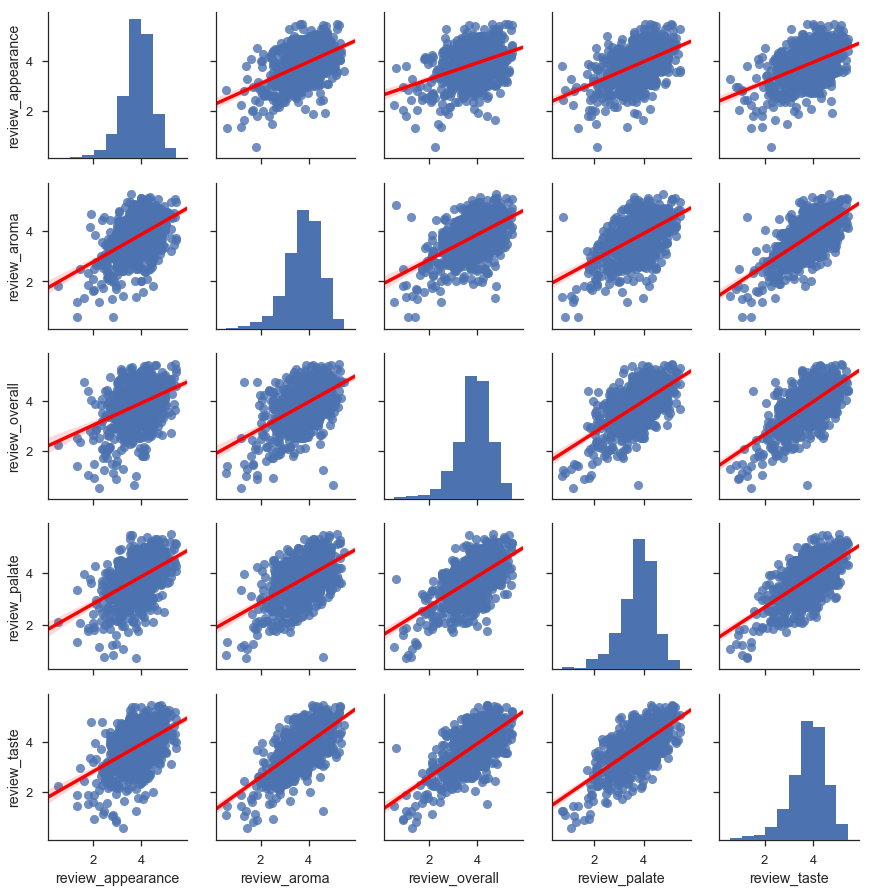

In [66]:
sns.pairplot(jittered_df[review_cols], kind='reg', 
             plot_kws={'line_kws':{'color': 'red'}})

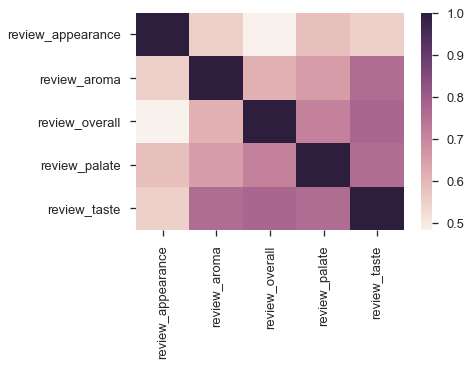

In [67]:
sns.heatmap(beer[review_cols].corr())

/Users/kfor/.conda/envs/forecast-2-fork/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/kfor/.conda/envs/forecast-2-fork/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


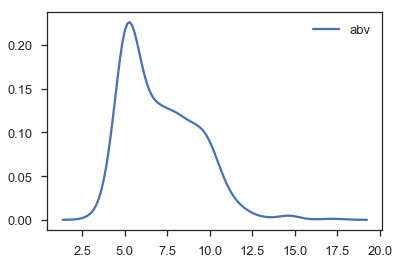

In [68]:
sns.kdeplot(beer['abv'])

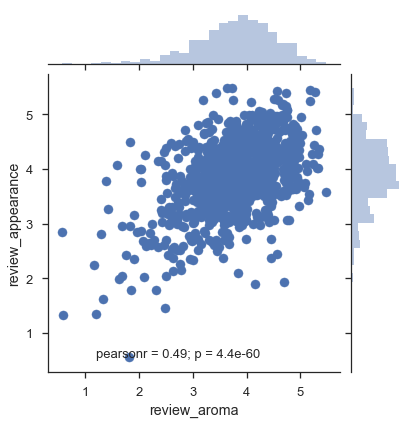

In [69]:
sns.jointplot(jittered_df['review_aroma'], jittered_df['review_appearance'])

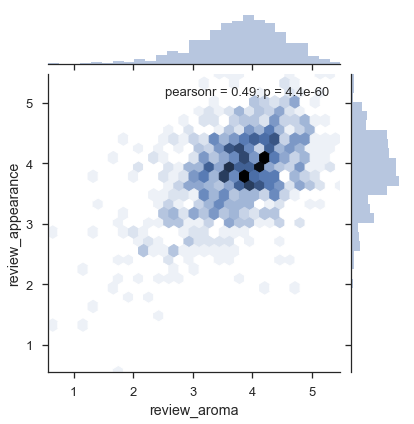

In [70]:
sns.jointplot(jittered_df['review_aroma'], jittered_df['review_appearance'],
              kind='hexbin')

In [71]:
titanic[['age','fare','pclass','survived']].dropna().head()

,age,fare,pclass,survived
0,29.0000,211.3375,1,1
1,0.9167,151.5500,1,1
2,2.0000,151.5500,1,0
3,30.0000,151.5500,1,0
4,25.0000,151.5500,1,0


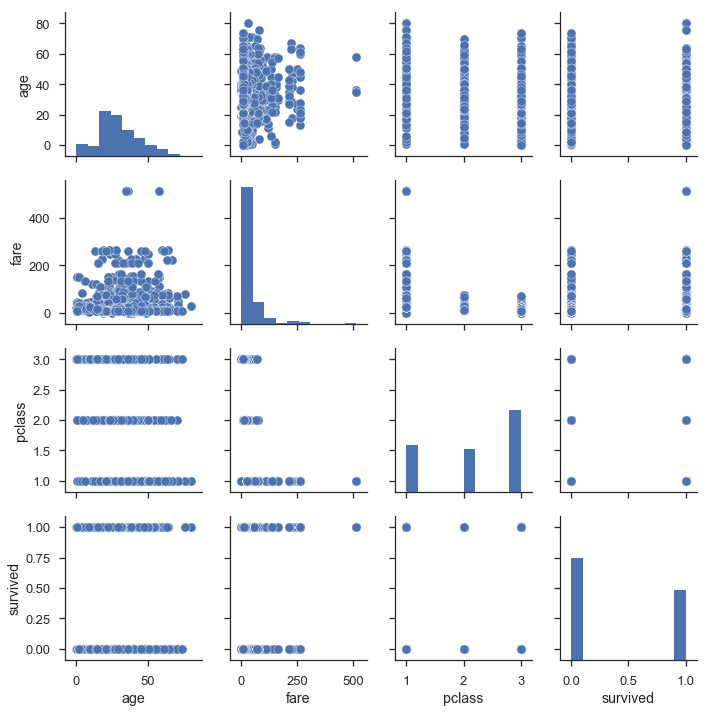

In [72]:
sns.pairplot(titanic[['age','fare','pclass','survived']].dropna())

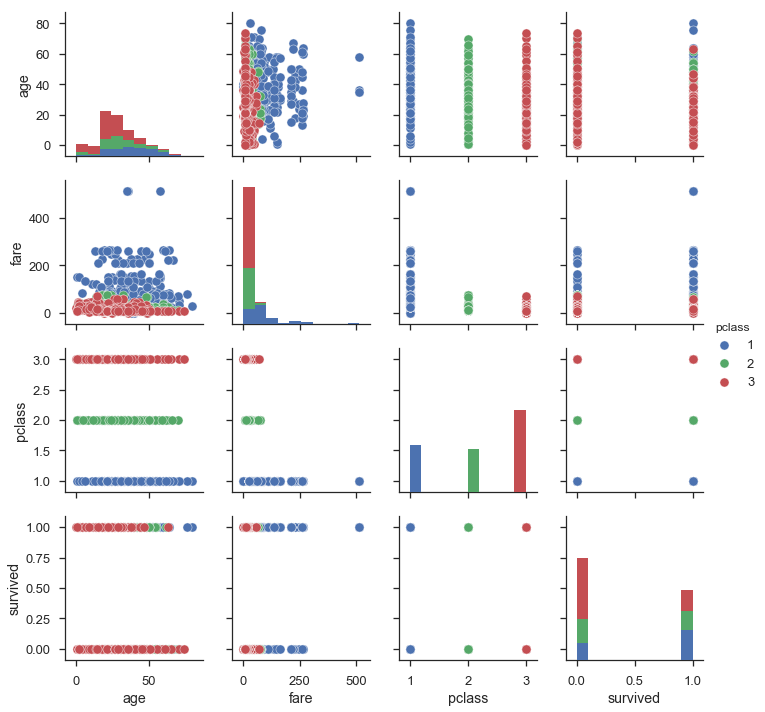

In [73]:
sns.pairplot(titanic[['age','fare','pclass','survived']].dropna(),
            hue='pclass')

Seaborn also returns `matplotlib` `axis` objects...

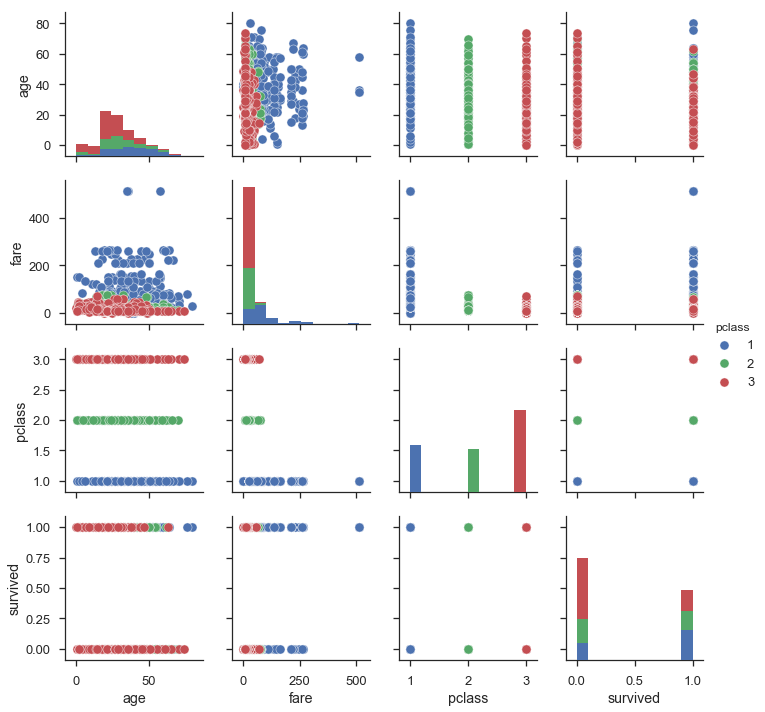

In [74]:
ax = sns.pairplot(titanic[['age','fare','pclass','survived']].dropna(),
            hue='pclass')

In [75]:
ax.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126316350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126f68b50>]], dtype=object)

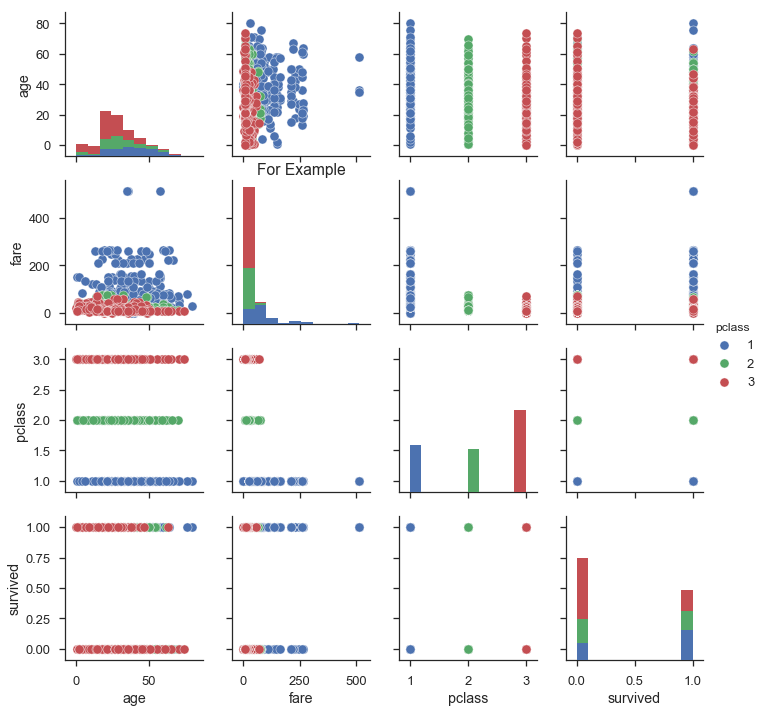

In [76]:
ax.axes[1,1].set_title('For Example')
ax.fig

# Exercise 3
Load in `data/processed/gbd_1to4_deaths_and_sdi.hdf` and recreate this plot using `seaborn`:
![Exercise 3](../img/exercise-3.png)

In [77]:
kids = pd.read_hdf('../data/processed/gbd_1to4_deaths_and_sdi.hdf')
kids.head()

death_rate       sdi
location_id year_id                      
6           1990       0.003253  0.733148
            1991       0.003092  0.739537
            1992       0.002907  0.745751
            1993       0.002722  0.751388
            1994       0.002550  0.756424

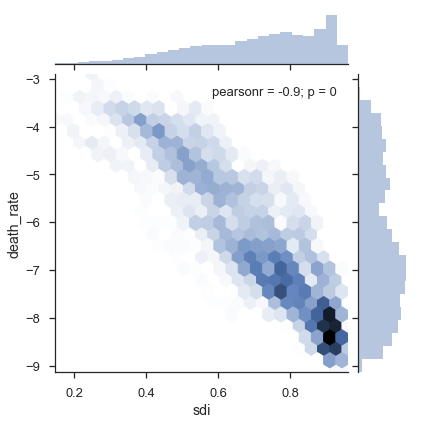

In [78]:
ax = sns.jointplot(kids['sdi'], np.log(kids['death_rate']), kind='hexbin')

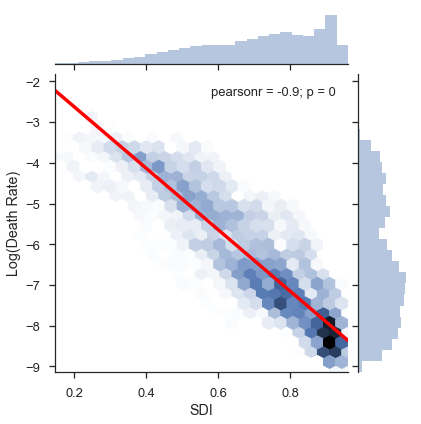

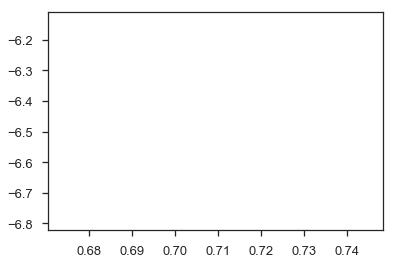

In [79]:
sns.regplot(kids['sdi'], np.log(kids['death_rate']), ax=ax.ax_joint, 
            scatter=False, line_kws={'color': 'red'})
ax.set_axis_labels(xlabel='SDI', ylabel='Log(Death Rate)')
ax.fig

### [ggplot](http://ggplot.yhathq.com/)

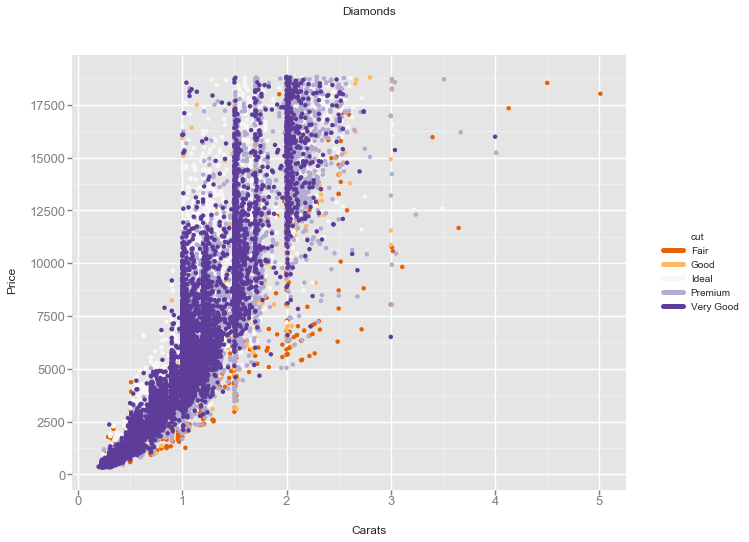

<ggplot: (310267097)>

In [81]:
from ggplot import *
ggplot(diamonds, aes(x='carat', y='price', color='cut')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Carats") + ylab("Price") + ggtitle("Diamonds")

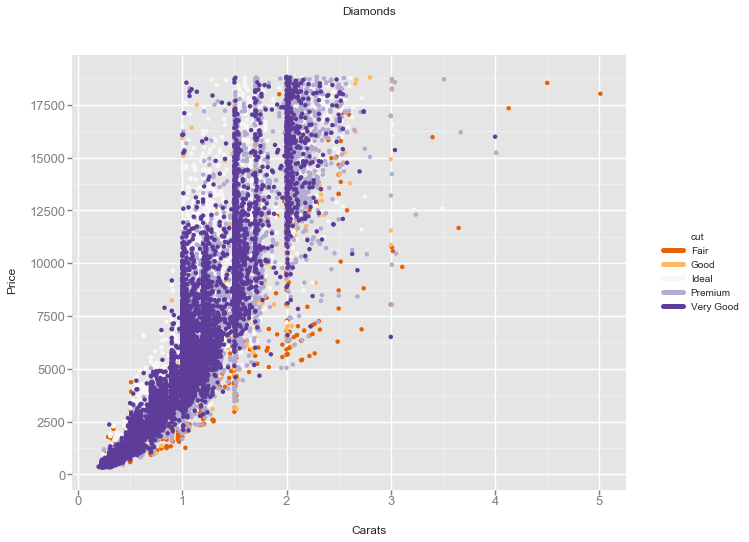

<ggplot: (311874741)>

In [82]:
p = ggplot(diamonds, aes(x='carat', y='price', color='cut'))
p += geom_point()
p += scale_color_brewer(type='diverging', palette=4)
p += xlab("Carats") 
p += ylab("Price") 
p += ggtitle("Diamonds")
p

In [83]:
p.fig.axes

### [Bokeh](http://bokeh.pydata.org/)

In [84]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.palettes import brewer
output_notebook()

N = 20
categories = ['y' + str(x) for x in range(10)]
data = {}
data['x'] = np.arange(N)
for cat in categories:
    data[cat] = np.random.randint(10, 100, size=N)

df = pd.DataFrame(data)
df = df.set_index(['x'])

def stacked(df, categories):
    areas = dict()
    last = np.zeros(len(df[categories[0]]))
    for cat in categories:
        next = last + df[cat]
        areas[cat] = np.hstack((last[::-1], next))
        last = next
    return areas

areas = stacked(df, categories)

colors = brewer["Spectral"][len(areas)]

x2 = np.hstack((data['x'][::-1], data['x']))

p = figure(x_range=(0, 19), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * len(areas), [areas[cat] for cat in categories],
          color=colors, alpha=0.8, line_color=None)

show(p, notebook_handle=True)
push_notebook()

Loading BokehJS ...

## So many plotting libraries!

In [85]:
display.HTML('<iframe src="https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/" width=1024 height=500>')

## References

Slide materials inspired by and adapted from [Chris Fonnesbeck](https://github.com/fonnesbeck/statistical-analysis-python-tutorial) and [Tom Augspurger](https://github.com/TomAugspurger/pydata-chi-h2t)